# Inverse Model Training: Adjusting Weights to Match Predefined Values
Study material: https://www.learnpytorch.io/

In [26]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## Creating data

In [27]:
# Create parameters
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
len(X), len(y)

(50, 50)

## Split data into training and testing sets

In [28]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualize data

In [29]:
def predicitons_plot(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(7, 5))

  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

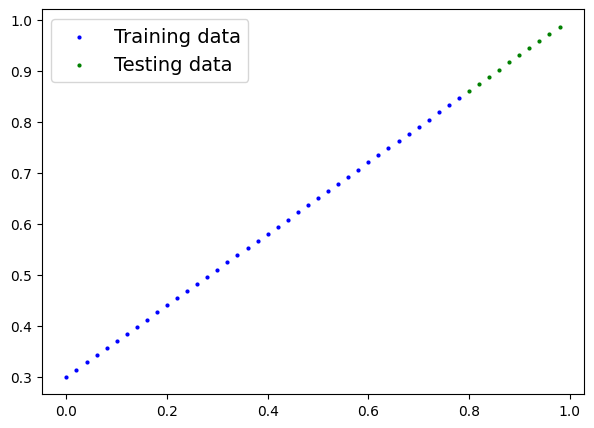

In [30]:
predicitons_plot()

## Build a linear regression model

In [31]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias

In [32]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters()), model_0.state_dict()

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

## Make a prediction with the model

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

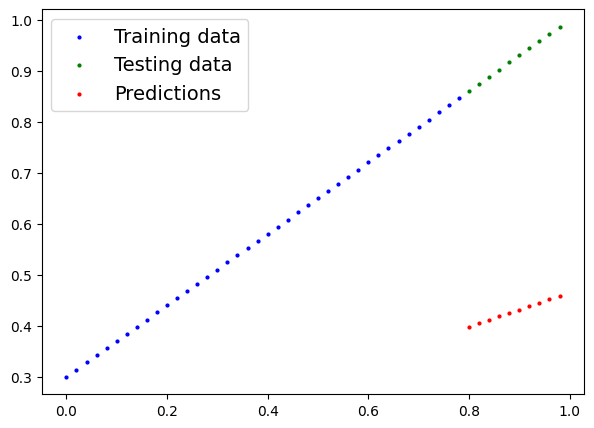

In [33]:
with torch.inference_mode():
  y_preds = model_0(X_test)
predicitons_plot(predictions=y_preds)

y_preds

## Measure the model prediction and adjust parameters

In [34]:
loss_fn = nn.L1Loss()
with torch.inference_mode():
  y_preds = model_0(X_test)
  l1_loss = loss_fn(y_preds, y_test)
l1_loss


tensor(0.4945)

In [35]:
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr - learning rate hyperparameter, defines how small/big the optimizer changes the parameters



## Train and test the model

In [36]:
torch.manual_seed(42)

epochs = 300

epoch_count = []
train_loss_values = []
test_loss_values = []

for epoch in range(epochs):
  model_0.train()
  y_preds = model_0(X_train)
  loss = loss_fn(y_preds, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()

  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds, y_test)

  if epoch % 50 == 0:
    epoch_count.append(epoch)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

print()
print(f"Expected weight: {weight} | Expected bias: {bias}")


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
OrderedDict([('weights', tensor([0.5800])), ('bias', tensor([0.3503]))])
Epoch: 150 | Loss: 0.0072835334576666355 | Test loss: 0.016474086791276932
OrderedDict([('weights', tensor([0.6654])), ('bias', tensor([0.3143]))])
Epoch: 200 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])
Epoch: 250 | Loss: 0.008932482451200485 | Test loss: 0.005023092031478882
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

Expected weight: 0.7 | Expected bias: 0.3


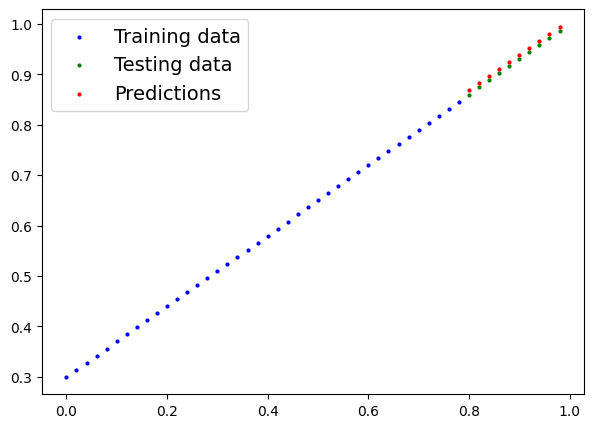

In [37]:
predicitons_plot(predictions=test_preds)


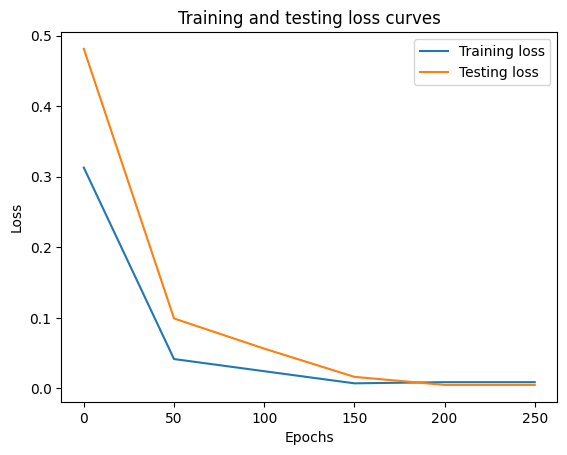

In [38]:
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="Training loss")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).numpy()), label="Testing loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [39]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

## Save and load the model

In [40]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_inverse_training_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [41]:
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)


In [42]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [43]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [44]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [45]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

y_preds == loaded_model_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])